### Loading Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt  
import json
from shapely.geometry import shape

#### Loading Data

In [ ]:
df = pd.read_csv('../data/consolidated_data/eda_dataset.csv')
gdf = gpd.read_file('../data/geo_data/geoBoundaries-MYS-ADM1_simplified.geojson')

In [ ]:
gdf.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Selangor,MY-10,15666254B89722251658211,MYS,ADM1,"MULTIPOLYGON (((101.2499 2.90772, 101.25593 2...."
1,Johor,MY-01,15666254B42356713390762,MYS,ADM1,"MULTIPOLYGON (((104.0624 2.21794, 104.06423 2...."
2,Kuala Lumpur,MY-14,15666254B97003483933575,MYS,ADM1,"POLYGON ((101.62807 3.13801, 101.6296 3.13681,..."
3,Malacca,MY-04,15666254B45695250728659,MYS,ADM1,"MULTIPOLYGON (((102.31921 2.11145, 102.32427 2..."
4,Negeri Sembilan,MY-05,15666254B60207109163985,MYS,ADM1,"POLYGON ((101.71245 2.59533, 101.7188 2.5952, ..."


In [ ]:
df.head()

,Unnamed: 0,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,...,cases_new_cumul,deaths_new_dod_cumul,daily_cumul,daily_full_cumul,rtk-ag_x_cumul,pcr_x_cumul,astra_cumul,pfizer_cumul,sinopharm_x_cumul,sinovac_cumul
0,0,2020-01-25,Johor,4,4,0,4,4,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-25,Kedah,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-25,Kelantan,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-25,Melaka,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(columns=['Unnamed: 0'])

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_new_cumul,deaths_new_dod_cumul,daily_cumul,daily_full_cumul,rtk-ag_x_cumul,pcr_x_cumul,astra_cumul,pfizer_cumul,sinopharm_x_cumul,sinovac_cumul
0,2020-01-25,Johor,4,4,0,4,4,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24763,2024-04-20,Selangor,39,0,8,37,4,0,8,27,...,5279819,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0
24764,2024-04-20,Terengganu,0,0,0,299,0,0,0,0,...,5279819,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0
24765,2024-04-20,W.P. Kuala Lumpur,33,0,5,585,6,0,3,24,...,5279852,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0
24766,2024-04-20,W.P. Labuan,0,0,0,28,0,0,0,0,...,5279852,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0


### Feature Alteration

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_20420\1172118729.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.area


<Axes: >

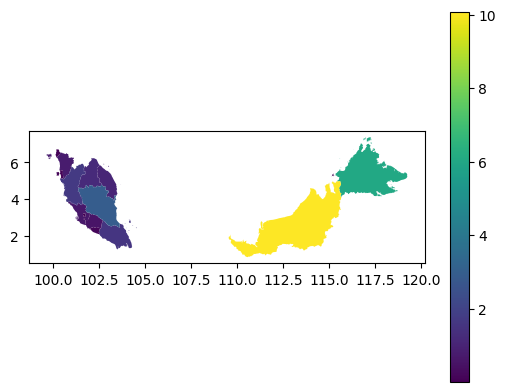

In [ ]:
gdf['area'] = gdf.area
gdf.plot('area',legend=True)

In [ ]:
df['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [ ]:
file = open('../data/geo_data/geoBoundaries-MYS-ADM1_simplified.geojson')
geojson = json.load(file)

In [ ]:
geojson

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'shapeName': 'Selangor',
    'shapeISO': 'MY-10',
    'shapeID': '15666254B89722251658211',
    'shapeGroup': 'MYS',
    'shapeType': 'ADM1'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[101.2499, 2.907715554176605],
       [101.25592519999998, 2.91031020000014],
       [101.25940980000001, 2.922492200000136],
       [101.25845590000011, 2.950754800000027],
       [101.25566860000009, 2.964474500000108],
       [101.25369390000009, 2.966116],
       [101.2366505, 2.9551972000001],
       [101.22982270000011, 2.945801000000131],
       [101.2318457, 2.936649900000077],
       [101.23289069999993, 2.938298800000041],
       [101.23304319999994, 2.937388900000087],
       [101.23137730000013, 2.931487000000118],
       [101.23202920000006, 2.927226800000028],
       [101.23318820000003, 2.924122600000032],

In [ ]:

# Extract features
features = geojson['features']

# Convert features to DataFrame
properties_list = [feature['properties'] for feature in features]
geometry_list = [shape(feature['geometry']) for feature in features]

# Create DataFrame
geo_df = pd.DataFrame(properties_list)
geo_df['geometry'] = geometry_list

#Replace
geo_df['shapeName'] = geo_df['shapeName'].replace('Malacca','Melaka')
geo_df['shapeName'] = geo_df['shapeName'].replace('Labuan','W.P. Labuan')
geo_df['shapeName'] = geo_df['shapeName'].replace('Kuala Lumpur','W.P. Kuala Lumpur')
geo_df['shapeName'] = geo_df['shapeName'].replace('Putrajaya','W.P. Putrajaya')
geo_df['shapeName'] = geo_df['shapeName'].replace('Penang','Pulau Pinang')
geo_df

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Selangor,MY-10,15666254B89722251658211,MYS,ADM1,"MULTIPOLYGON (((101.2499 2.907715554176605, 10..."
1,Johor,MY-01,15666254B42356713390762,MYS,ADM1,"MULTIPOLYGON (((104.0624 2.217938532369939, 10..."
2,W.P. Kuala Lumpur,MY-14,15666254B97003483933575,MYS,ADM1,"POLYGON ((101.628069 3.138012, 101.6296007 3.1..."
3,Melaka,MY-04,15666254B45695250728659,MYS,ADM1,"MULTIPOLYGON (((102.3192095 2.1114455, 102.324..."
4,Negeri Sembilan,MY-05,15666254B60207109163985,MYS,ADM1,"POLYGON ((101.7124503 2.5953285, 101.7187991 2..."
5,Sabah,MY-12,15666254B50935235229272,MYS,ADM1,MULTIPOLYGON (((117.62919269999998 4.201556700...
6,Sarawak,MY-13,15666254B8535925993004,MYS,ADM1,"MULTIPOLYGON (((110.2974526 1.6634805, 110.301..."
7,Kelantan,MY-03,15666254B53975248776023,MYS,ADM1,"POLYGON ((101.69131 5.755099, 101.6905189 5.74..."
8,W.P. Putrajaya,MY-16,15666254B54729125478011,MYS,ADM1,"POLYGON ((101.6804586 2.8805165, 101.6806176 2..."
9,Terengganu,MY-11,15666254B71460903090065,MYS,ADM1,"MULTIPOLYGON (((103.67313349999995 4.8032733, ..."


In [ ]:
state_to_geometry = dict(zip(geo_df['shapeName'], geo_df['geometry']))
df['geometry'] = df['state'].apply(lambda x: state_to_geometry.get(x))

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,deaths_new_dod_cumul,daily_cumul,daily_full_cumul,rtk-ag_x_cumul,pcr_x_cumul,astra_cumul,pfizer_cumul,sinopharm_x_cumul,sinovac_cumul,geometry
0,2020-01-25,Johor,4,4,0,4,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((104.0624 2.217938532369939, 10..."
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MULTIPOLYGON (((99.72140386867892 6.2083726194...
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((101.69131 5.755099, 101.6905189 5.74..."
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((102.3192095 2.1114455, 102.324..."
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((101.7124503 2.5953285, 101.7187991 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24763,2024-04-20,Selangor,39,0,8,37,4,0,8,27,...,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0,"MULTIPOLYGON (((101.2499 2.907715554176605, 10..."
24764,2024-04-20,Terengganu,0,0,0,299,0,0,0,0,...,37349.0,72654837.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592494.0,"MULTIPOLYGON (((103.67313349999995 4.8032733, ..."
24765,2024-04-20,W.P. Kuala Lumpur,33,0,5,585,6,0,3,24,...,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0,"POLYGON ((101.628069 3.138012, 101.6296007 3.1..."
24766,2024-04-20,W.P. Labuan,0,0,0,28,0,0,0,0,...,37349.0,72654840.0,27550991.0,38841950.0,13900557.0,5707686.0,45063055.0,44306.0,21592497.0,"MULTIPOLYGON (((115.1315 5.2169905, 115.137065..."


In [ ]:
df.isna().sum()

date                 0
state                0
cases_new            0
cases_import         0
cases_recovered      0
                    ..
astra_cumul          0
pfizer_cumul         0
sinopharm_x_cumul    0
sinovac_cumul        0
geometry             0
Length: 73, dtype: int64

In [ ]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'mo

In [ ]:
gdf = gpd.GeoDataFrame(df[['state','geometry']])
gdf = gdf.drop_duplicates()

In [ ]:
df_state_pop = pd.read_csv('../data/static/population.csv')
df_state_pop.set_index('state',inplace=True)
dict_pop = df_state_pop.to_dict()

In [ ]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'mo

In [ ]:
def last(x):
    return x.iloc[-1]
#cases_new
gdf['mean_cases_new'] = df.groupby('state')['cases_new'].mean().reset_index()['cases_new']

gdf['max_cases_new'] = df.groupby('state')['cases_new'].max().reset_index()['cases_new']
gdf['total_deaths'] = df.groupby('state')['deaths_new_dod'].sum().reset_index()['deaths_new_dod']
gdf['max_active_cases'] = df.groupby('state')['cases_active'].max().reset_index()['cases_active']

gdf['max_cases_new_capita'] = gdf['max_cases_new'] / df['state'].map(dict_pop['pop'])
gdf['total_deaths_capita'] = gdf['total_deaths'] / df['state'].map(dict_pop['pop'])
gdf['max_active_cases_capita'] = gdf['max_active_cases'] / df['state'].map(dict_pop['pop'])

gdf['latest_vaccinations'] = df.groupby('state')['daily_full'].sum().reset_index()['daily_full']

gdf['avg_hosp_usage'] = df.groupby('state')['hosp_covid_hospital'].mean().reset_index()['hosp_covid_hospital']

In [ ]:
for columns in gdf.columns:
    print(columns)

state
geometry
mean_cases_new
max_cases_new
total_deaths
max_active_cases
max_cases_new_capita
total_deaths_capita
max_active_cases_capita
latest_vaccinations
avg_hosp_usage


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

---

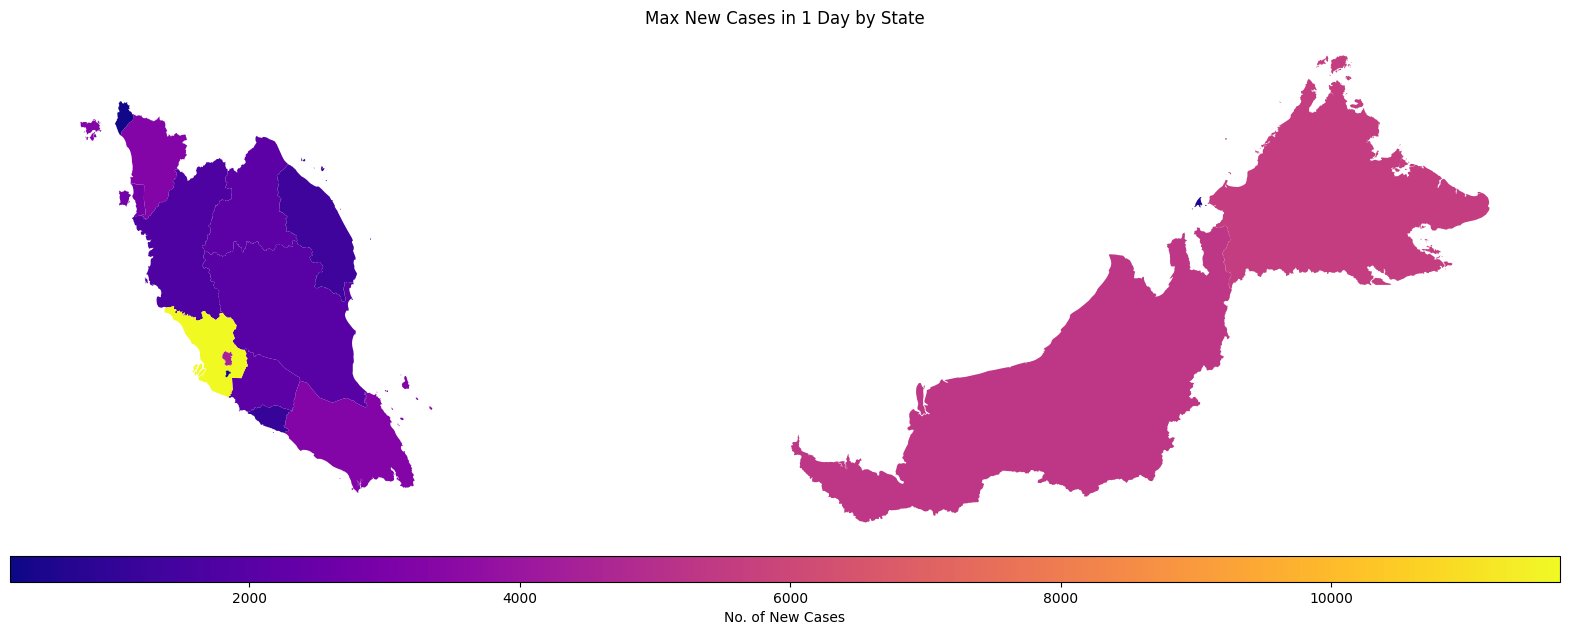

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='max_cases_new', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of New Cases", "orientation": "horizontal"},cmap='plasma')
ax.set_title('Max New Cases in 1 Day by State')
ax.axis('off')
plt.show()

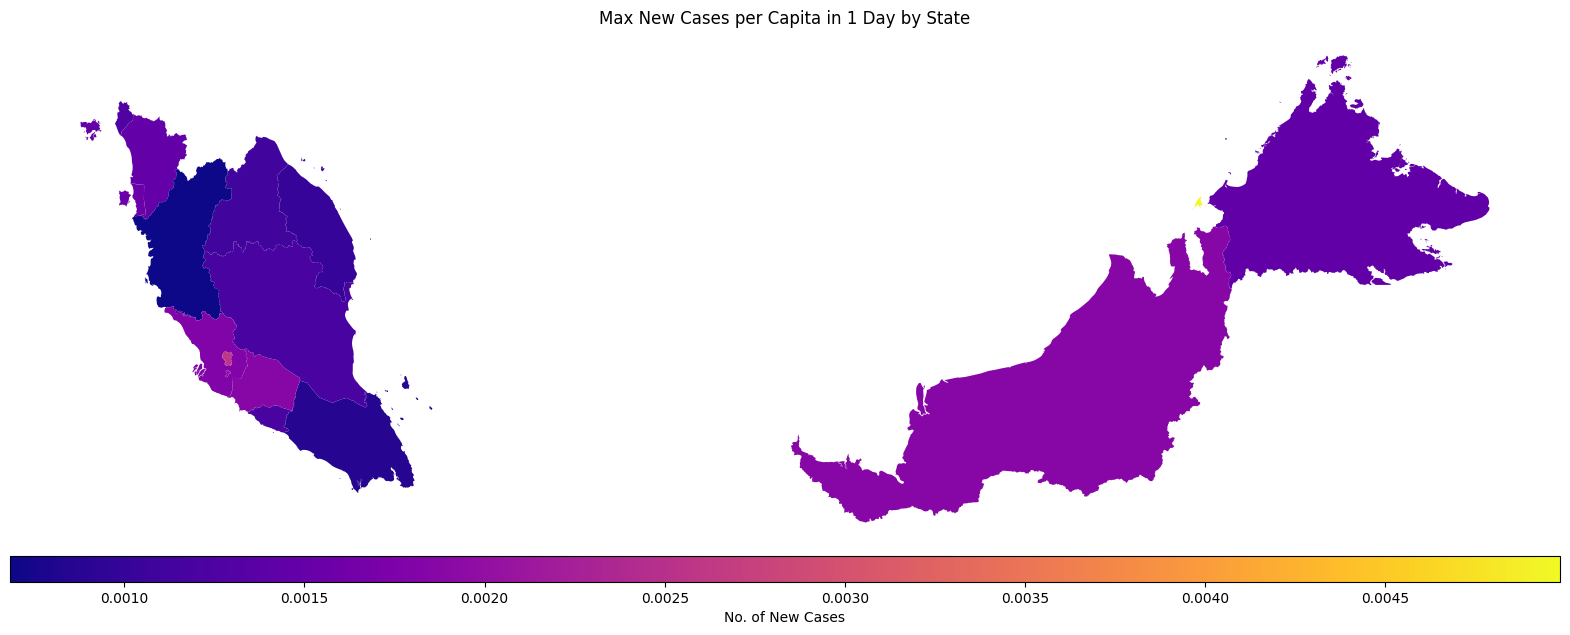

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='max_cases_new_capita', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of New Cases", "orientation": "horizontal"},cmap='plasma')
ax.set_title('Max New Cases per Capita in 1 Day by State')
ax.axis('off')
plt.show()

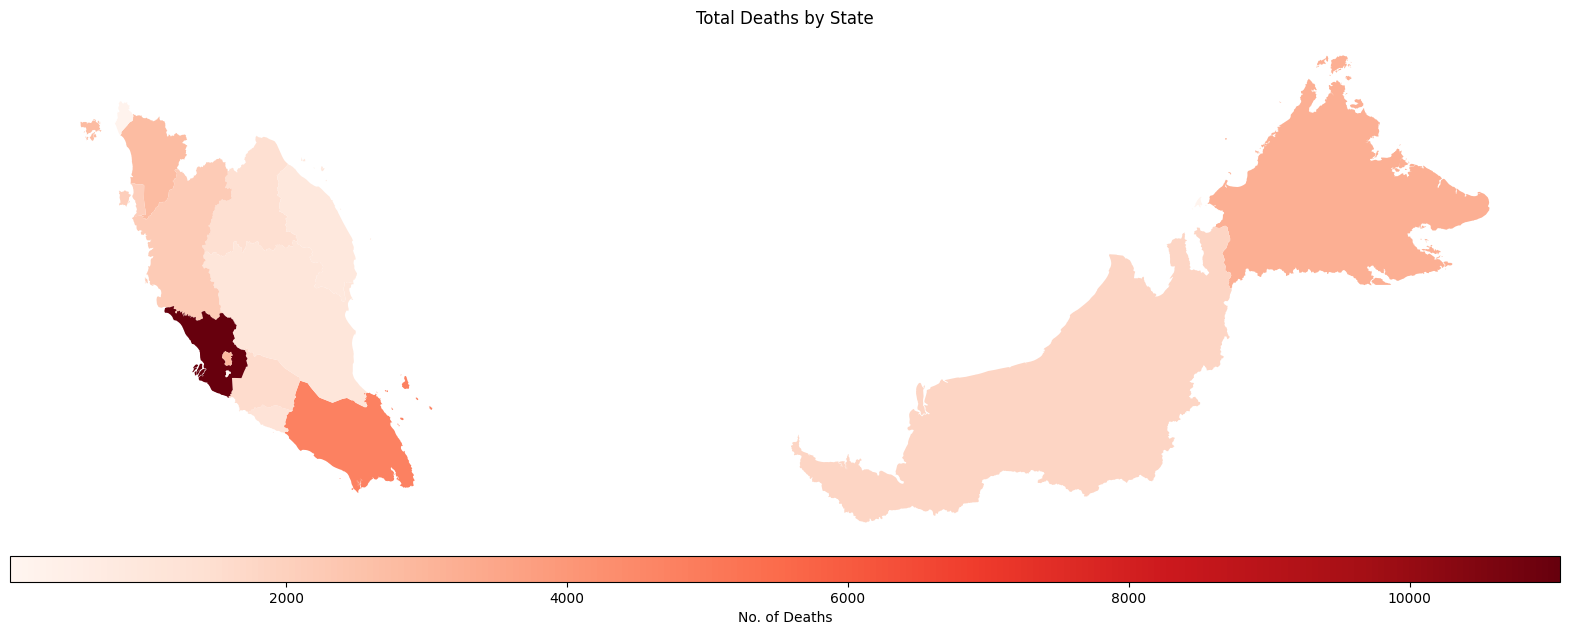

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='total_deaths', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of Deaths", "orientation": "horizontal"},cmap='Reds')
ax.set_title('Total Deaths by State')
ax.axis('off')
plt.show()

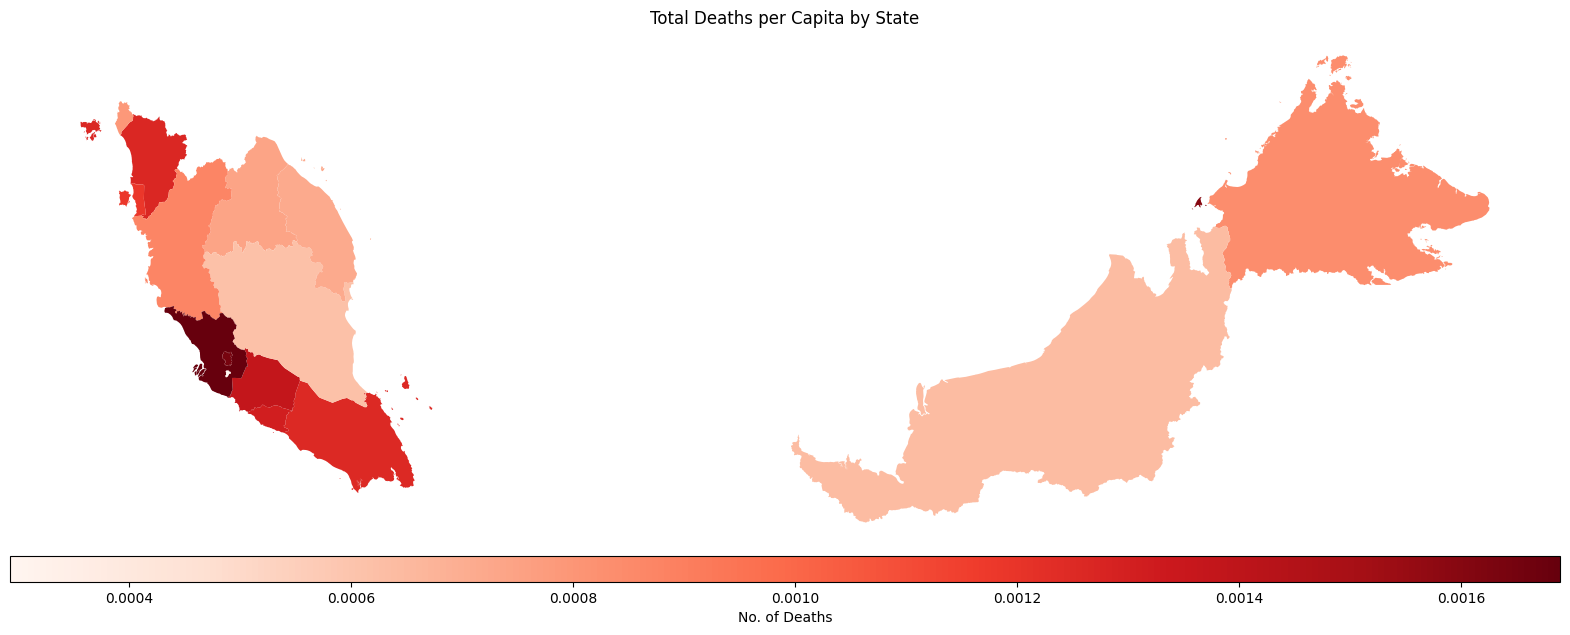

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='total_deaths_capita', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of Deaths", "orientation": "horizontal"},cmap='Reds')
ax.set_title('Total Deaths per Capita by State')
ax.axis('off')
plt.show()

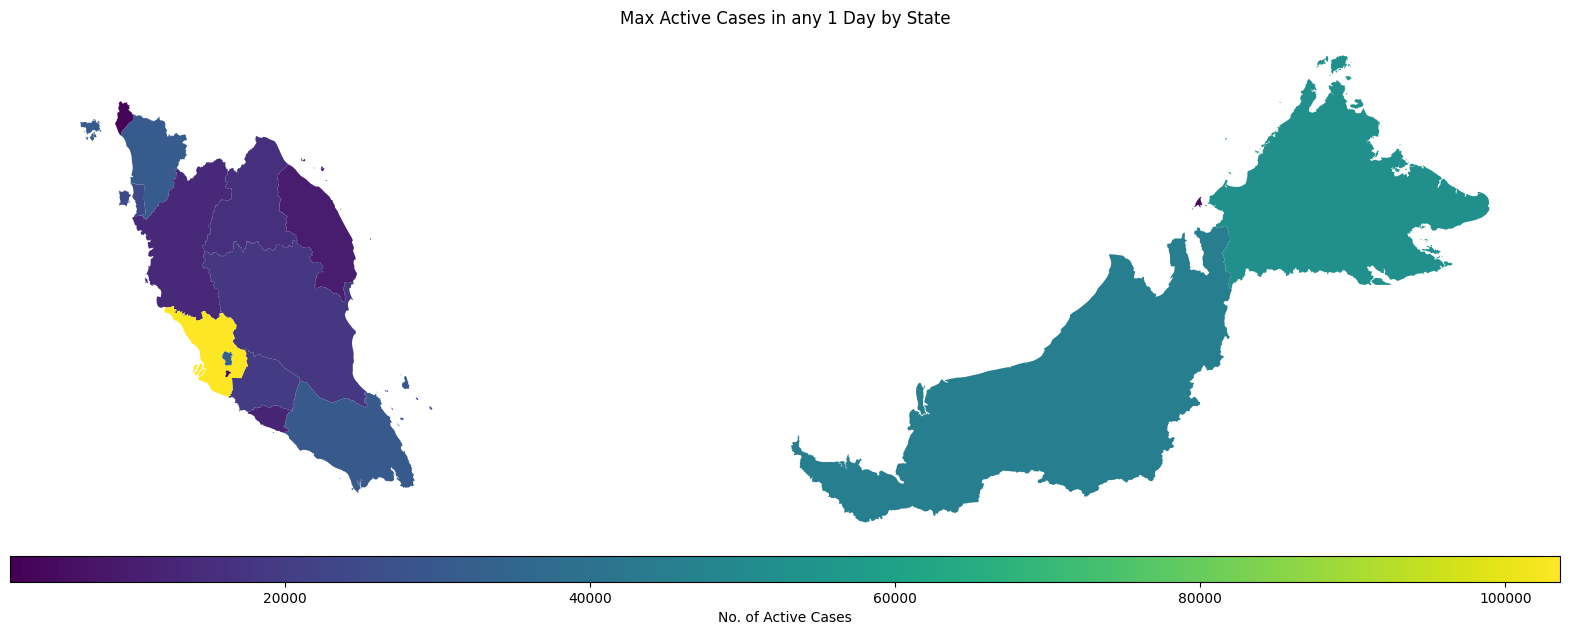

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='max_active_cases', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of Active Cases", "orientation": "horizontal"},cmap='viridis')
ax.set_title('Max Active Cases in any 1 Day by State')
ax.axis('off')
plt.show()

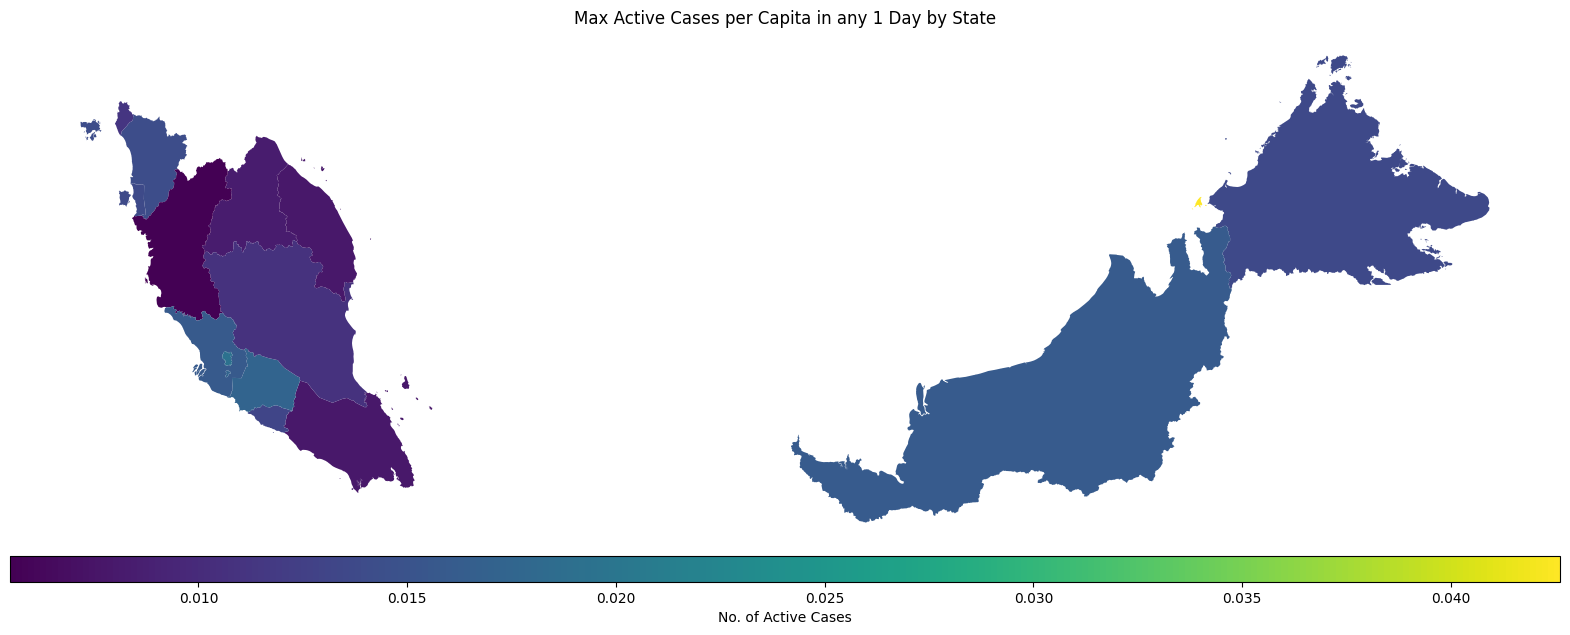

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
gdf.plot(column='max_active_cases_capita', ax=ax, legend=True, cax=cax, legend_kwds={"label": "No. of Active Cases", "orientation": "horizontal"},cmap='viridis')
ax.set_title('Max Active Cases per Capita in any 1 Day by State')
ax.axis('off')
plt.show()

In [ ]:
gdf

,state,geometry,mean_cases_new,max_cases_new,total_deaths,max_active_cases,max_cases_new_capita,total_deaths_capita,max_active_cases_capita,latest_vaccinations,avg_hosp_usage
0,Johor,"MULTIPOLYGON (((104.0624 2.21794, 104.06423 2....",266.923773,3238,4771.0,29863,0.000853,0.001257,0.007871,3303377.0,289.525194
1,Kedah,"MULTIPOLYGON (((99.7214 6.20837, 99.72257 6.20...",213.062016,3243,2774.0,30923,0.001478,0.001265,0.014097,1666309.0,128.921189
2,Kelantan,"POLYGON ((101.69131 5.7551, 101.69052 5.74661,...",173.033592,2135,1430.0,16101,0.001107,0.000741,0.008347,1227138.0,130.361111
3,Melaka,"MULTIPOLYGON (((102.31921 2.11145, 102.32427 2...",104.108527,1120,1227.0,12222,0.001194,0.001308,0.013033,781923.0,69.081395
4,Negeri Sembilan,"POLYGON ((101.71245 2.59533, 101.7188 2.5952, ...",155.974806,2115,1552.0,19605,0.001874,0.001375,0.017366,1018511.0,135.761628
5,Pahang,"POLYGON ((101.91502 3.25679, 101.92473 3.26698...",122.083979,2006,1042.0,18264,0.001191,0.000619,0.010841,1254412.0,88.521318
6,Perak,"MULTIPOLYGON (((100.63654 4.15716, 100.63725 4...",161.029716,1713,2190.0,13760,0.000683,0.000873,0.005484,1983849.0,136.465116
7,Perlis,"POLYGON ((100.37185 6.53739, 100.36595 6.54005...",13.315245,321,202.0,2872,0.001256,0.000791,0.011241,213564.0,17.491602
8,Pulau Pinang,"MULTIPOLYGON (((100.33992 5.5771, 100.33822 5....",206.731912,2773,2101.0,24441,0.001563,0.001184,0.013776,1615001.0,92.036176
9,Sabah,"MULTIPOLYGON (((117.62919 4.20156, 117.63554 4...",266.885013,5565,3216.0,52616,0.001452,0.000839,0.013729,2527146.0,205.851421


In [ ]:
gdf['latest_vaccinations']

0     3303377.0
1     1666309.0
2     1227138.0
3      781923.0
4     1018511.0
5     1254412.0
6     1983849.0
7      213564.0
8     1615001.0
9     2527146.0
10    2434392.0
11    5182262.0
12     918921.0
13    3173095.0
14      85389.0
15     165702.0
Name: latest_vaccinations, dtype: float64

In [ ]:
df.columns


Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'mo

In [ ]:
gdf.columns

Index(['state', 'geometry', 'mean_cases_new', 'max_cases_new', 'total_deaths',
       'max_active_cases', 'max_cases_new_capita', 'total_deaths_capita',
       'max_active_cases_capita', 'latest_vaccinations', 'avg_hosp_usage'],
      dtype='object')

In [ ]:
df.groupby('state')['cases_new'].mean().tolist()

[266.92377260981914,
 213.06201550387595,
 173.03359173126614,
 104.10852713178295,
 155.9748062015504,
 122.08397932816537,
 161.0297157622739,
 13.315245478036175,
 206.73191214470285,
 266.88501291989667,
 214.90245478036175,
 1048.062015503876,
 91.34108527131782,
 333.0859173126615,
 15.38953488372093,
 24.829457364341085]

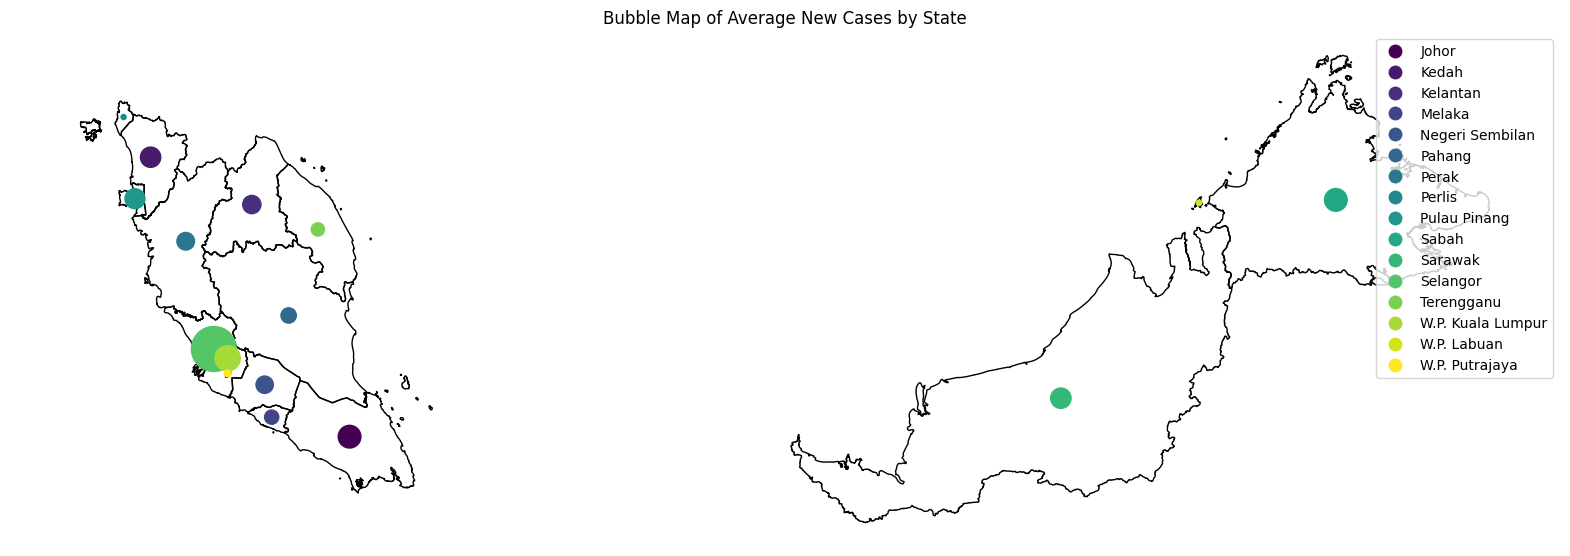

In [ ]:
centroids = gdf.copy() 
centroids['geometry'] = gdf['geometry'].centroid
centroids['size'] = df.groupby('state')['cases_new'].mean().tolist()
fig, ax = plt.subplots(figsize=(20, 10))

gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
centroids.plot(ax=ax, marker='o', markersize=centroids['size'], column='state', legend=True, cmap='viridis')

ax.set_title('Bubble Map of Average New Cases by State')
ax.axis('off')
plt.show()

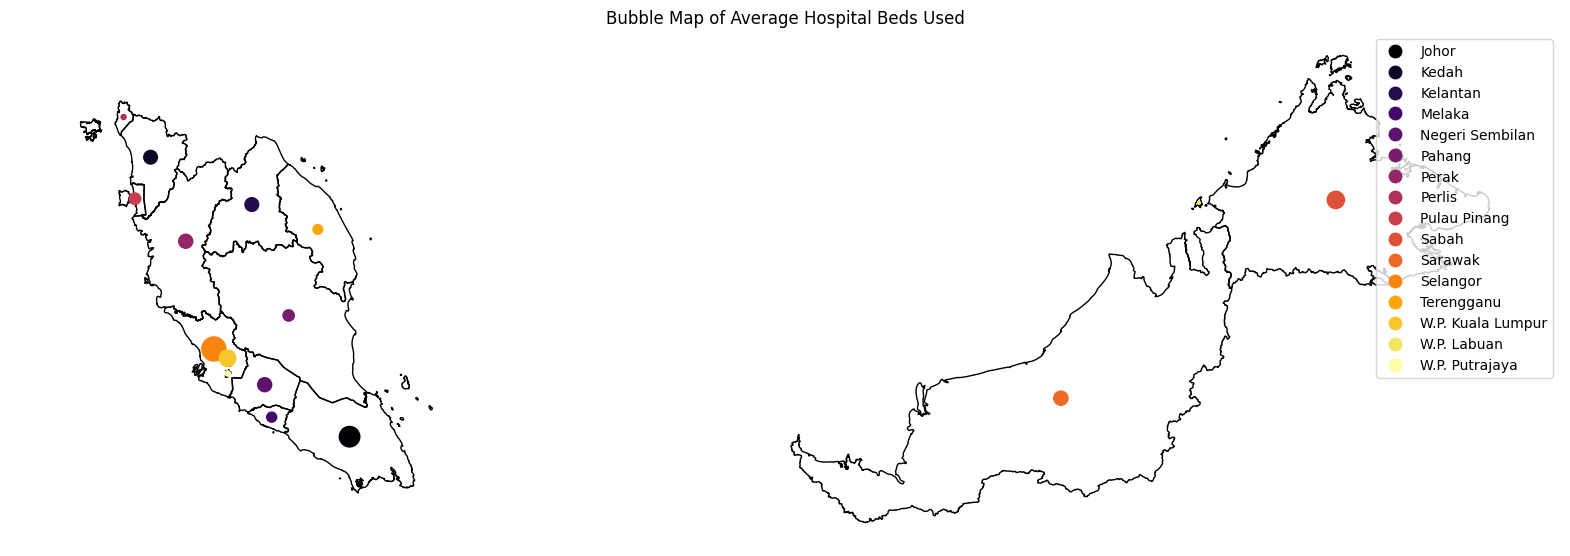

In [ ]:
centroids = gdf.copy()
centroids['geometry'] = gdf['geometry'].centroid
centroids['size'] = gdf['avg_hosp_usage']*3

fig, ax = plt.subplots(figsize=(20, 10))

gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
centroids.plot(ax=ax, marker='.', markersize=centroids['size'], column='state', legend=True, cmap='inferno')

ax.set_title('Bubble Map of Average Hospital Beds Used')
ax.axis('off')
plt.show()

### Regular Plotting

In [ ]:
df_malaysia = pd.read_csv('../data/consolidated_data/all_malaysia.csv')
df_malaysia.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [ ]:
df_malaysia['date'] = pd.to_datetime(df_malaysia['date'])
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_malaysia

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat,rtk-ag,pcr
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.0
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2024-04-16,110,0,44,7736,0,21,1,28,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1544,2024-04-17,125,0,40,7821,0,20,0,22,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1545,2024-04-18,134,0,31,7924,0,12,0,24,98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1546,2024-04-19,135,0,21,8038,0,20,1,18,96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


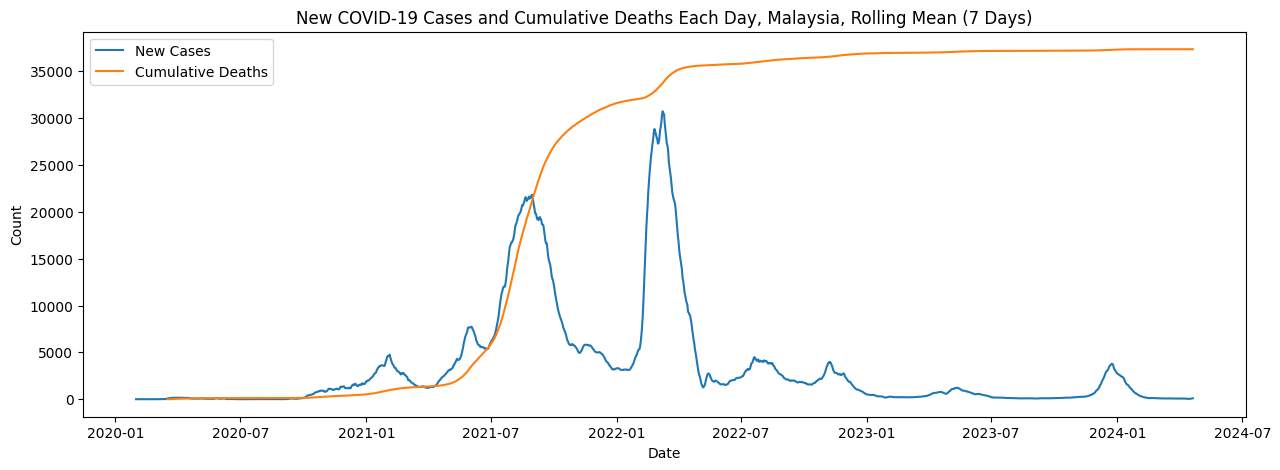

In [ ]:
plt.figure(figsize=(15,5))
plt.title('New COVID-19 Cases and Cumulative Deaths Each Day, Malaysia, Rolling Mean (7 Days)')
sns.lineplot(x=df_malaysia['date'], y=df_malaysia['cases_new'].rolling(7).mean(), label='New Cases')
sns.lineplot(x=df_malaysia['date'], y=df_malaysia['deaths_new_dod'].cumsum(), label='Cumulative Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].iloc[500:1000]

,cases_unvax,cases_pvax,cases_fvax,cases_boost
500,0,0,0,0
501,0,0,0,0
502,0,0,0,0
503,0,0,0,0
504,0,0,0,0
...,...,...,...,...
995,0,0,0,0
996,6,0,0,0
997,5,0,0,0
998,7,0,0,0


In [ ]:
vax_status.iloc[500:1000]

NameError: name 'vax_status' is not defined

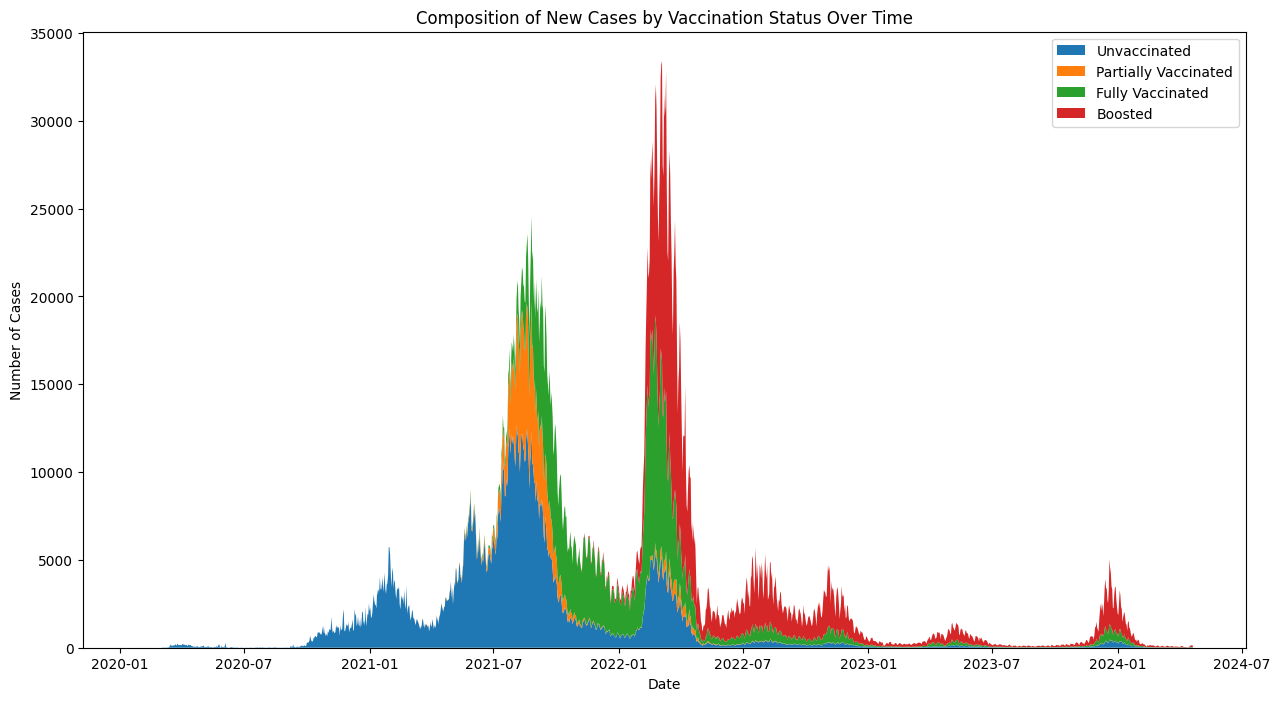

In [ ]:
vax_status = df.groupby('date')[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].sum()

plt.figure(figsize=(15, 8))
plt.stackplot(vax_status.index, 
              vax_status['cases_unvax'], 
              vax_status['cases_pvax'], 
              vax_status['cases_fvax'], 
              vax_status['cases_boost'], 
              labels=['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted'])
plt.title('Composition of New Cases by Vaccination Status Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


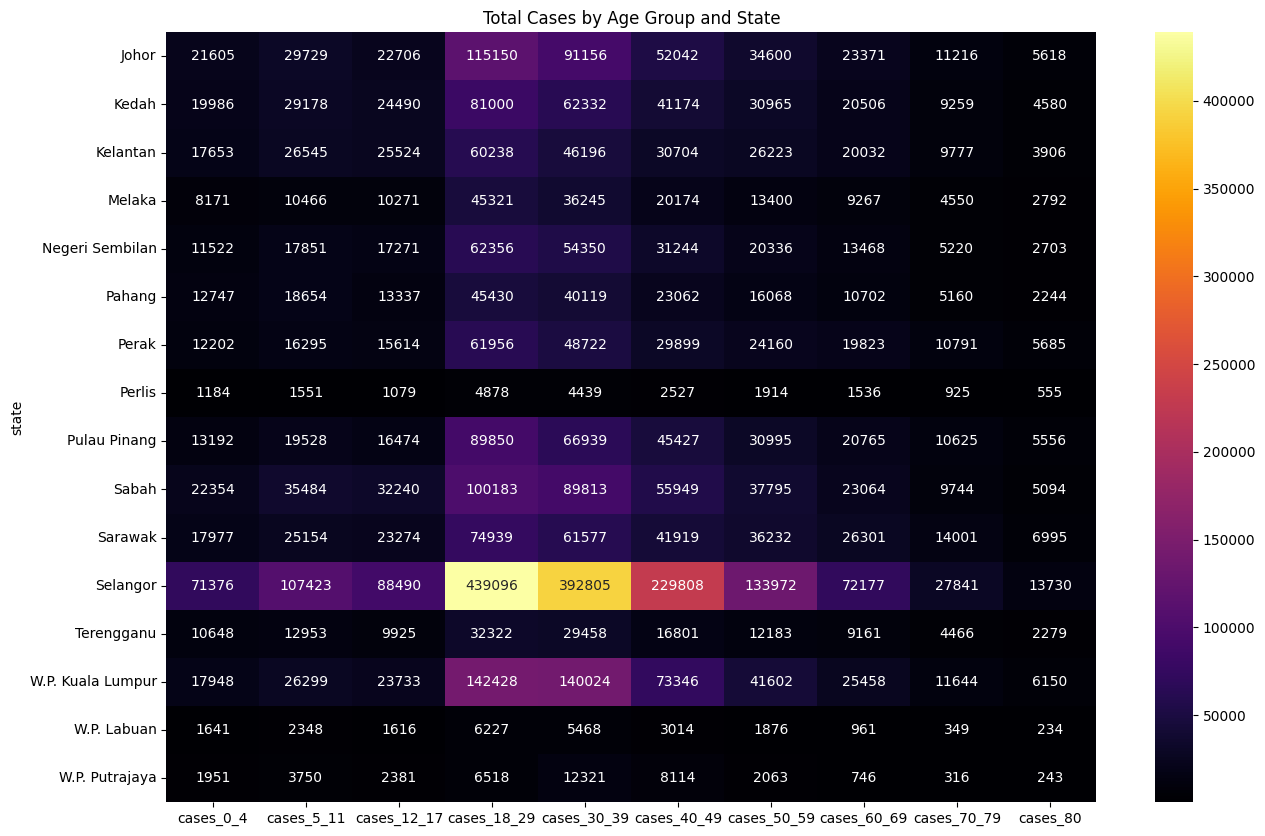

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.groupby('state')[['cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 
              'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80']].sum(), annot=True, fmt='g', cmap='inferno')
plt.title('Total Cases by Age Group and State')
plt.show()

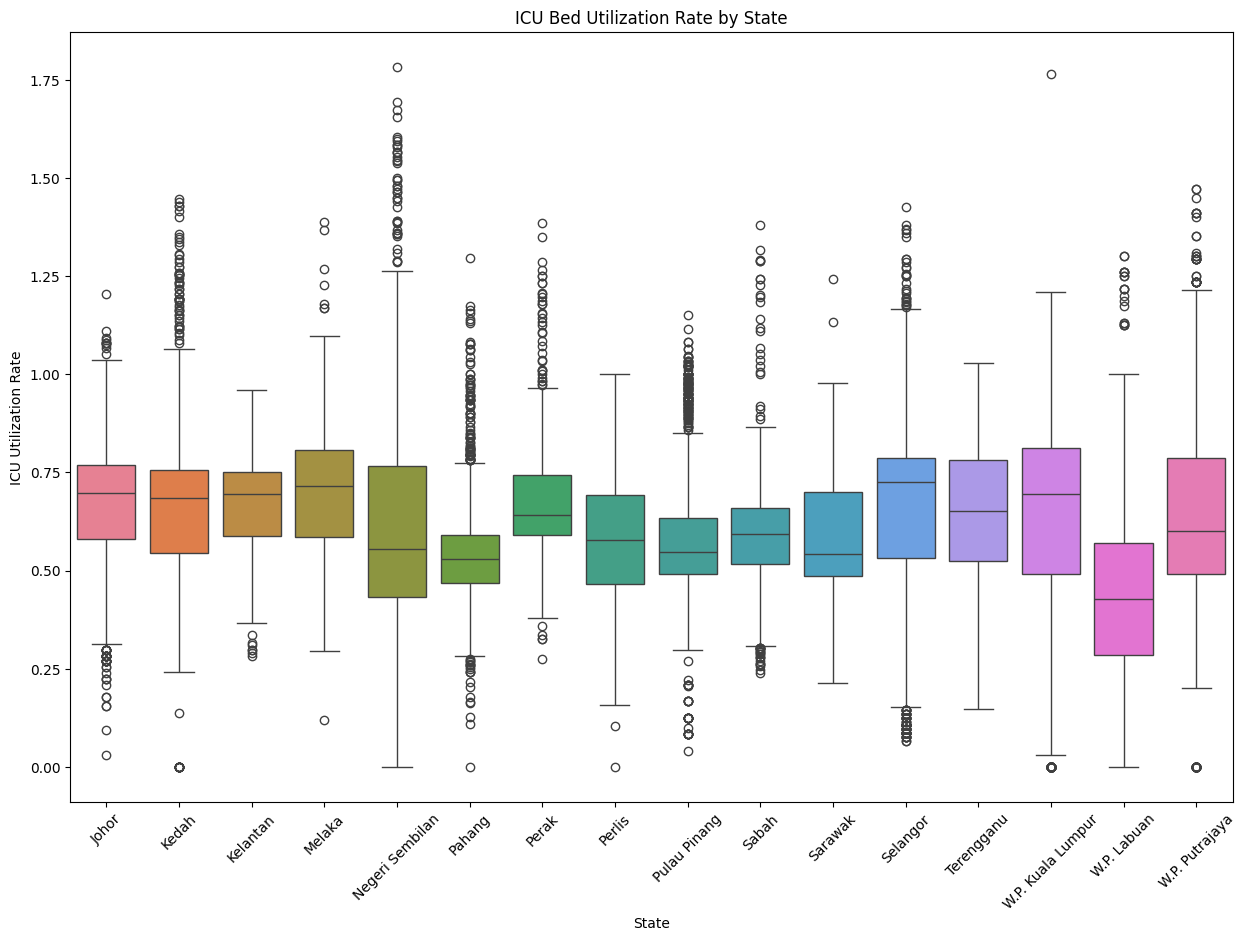

In [ ]:

df['icu_utilization_rate'] = (df['icu_covid'] + df['icu_pui'] + df['icu_noncovid']) / df['beds_icu_total']

plt.figure(figsize=(15, 10))
sns.boxplot(x='state', y='icu_utilization_rate',hue='state', data=df)
plt.title('ICU Bed Utilization Rate by State')
plt.xlabel('State')
plt.ylabel('ICU Utilization Rate')
plt.xticks(rotation=45)
plt.show()

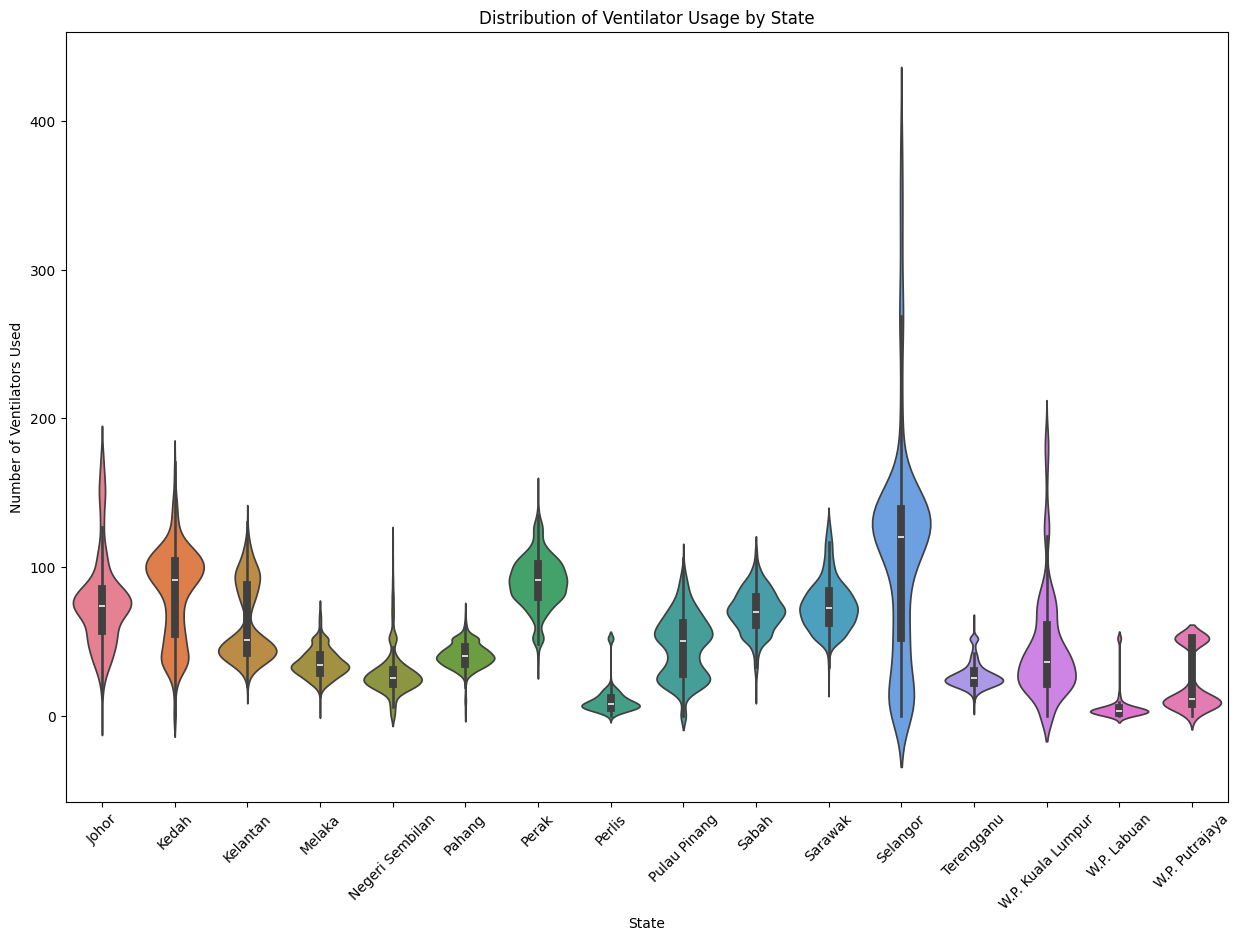

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='state', y='vent_used',hue='state', data=df)
plt.title('Distribution of Ventilator Usage by State')
plt.xlabel('State')
plt.ylabel('Number of Ventilators Used')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

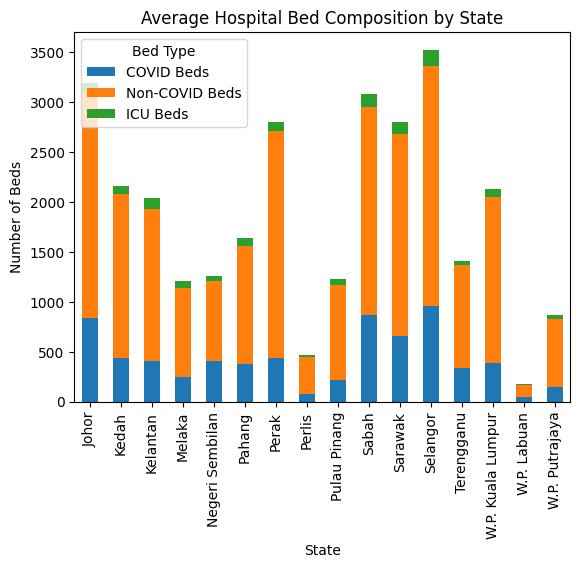

In [ ]:
bed_data = df.groupby('state')[['beds_covid_hospital', 'hosp_noncovid_hospital', 'beds_icu_total']].mean()

plt.figure(figsize=(15, 10))
bed_data.plot(kind='bar', stacked=True)
plt.title('Average Hospital Bed Composition by State')
plt.xlabel('State')
plt.ylabel('Number of Beds')
plt.legend(title='Bed Type', labels=['COVID Beds', 'Non-COVID Beds', 'ICU Beds'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_vax= pd.read_csv('../data/vaccination/vax_malaysia.csv')
vaccinated_pct = (df_vax['cumul_full']/df_vax['cumul_full'].iloc[-1]) * 100

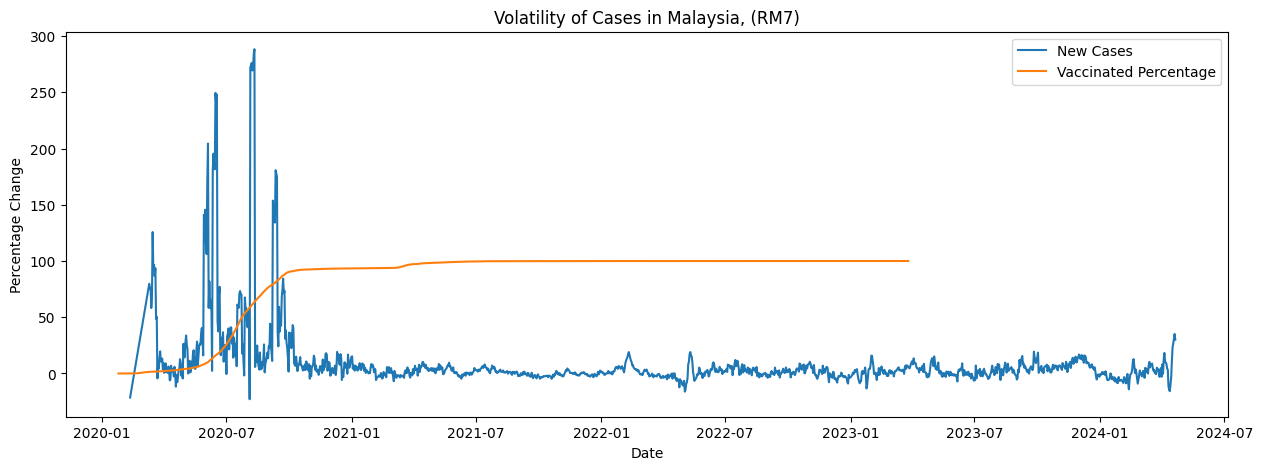

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Volatility of Cases in Malaysia, (RM7)')
sns.lineplot(x=df_malaysia['date'], y=df_malaysia['cases_new'].pct_change().rolling(7).mean()* 100, label='New Cases')
sns.lineplot(x=df_malaysia['date'], y=vaccinated_pct, label='Vaccinated Percentage')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

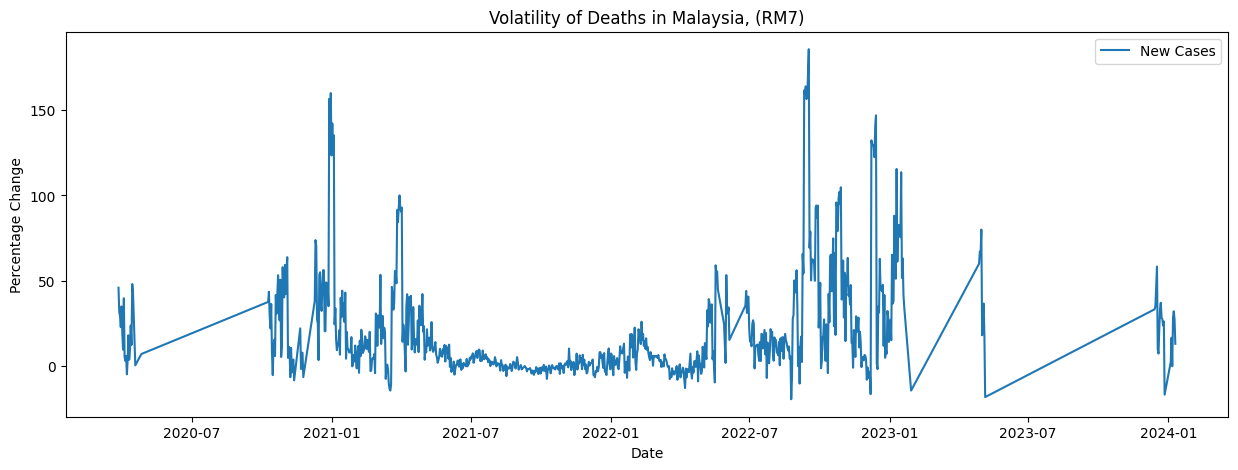

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Volatility of Deaths in Malaysia, (RM7)')
sns.lineplot(x=df_malaysia['date'], y=df_malaysia['deaths_new_dod'].pct_change().rolling(7).mean()* 100, label='New Cases')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

---

In [ ]:
df.drop(columns=['geometry'],inplace=True)
df = df.groupby('date').sum()

In [ ]:
df

,state,cases_new,cases_import,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_0_4,...,cases_new_cumul,deaths_new_dod_cumul,daily_cumul,daily_full_cumul,rtk-ag_x_cumul,pcr_x_cumul,astra_cumul,pfizer_cumul,sinopharm_x_cumul,sinovac_cumul
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,JohorKedahKelantanMelakaNegeri SembilanPahangP...,4,4,0,4,4,0,0,0,0,...,64,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,JohorKedahKelantanMelakaNegeri SembilanPahangP...,0,0,0,4,0,0,0,0,0,...,64,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,JohorKedahKelantanMelakaNegeri SembilanPahangP...,0,0,0,4,0,0,0,0,0,...,64,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,JohorKedahKelantanMelakaNegeri SembilanPahangP...,0,0,0,4,0,0,0,0,0,...,64,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,JohorKedahKelantanMelakaNegeri SembilanPahangP...,3,3,0,7,3,0,0,0,1,...,111,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-16,JohorKedahKelantanMelakaNegeri SembilanPahangP...,110,0,44,7736,21,1,28,60,5,...,84468588,597584.0,1.162474e+09,440815688.0,621471200.0,222408912.0,91322976.0,721008864.0,708896.0,345476872.0
2024-04-17,JohorKedahKelantanMelakaNegeri SembilanPahangP...,125,0,40,7821,20,0,22,83,4,...,84470507,597584.0,1.162475e+09,440815696.0,621471200.0,222408912.0,91322976.0,721008864.0,708896.0,345477510.0
2024-04-18,JohorKedahKelantanMelakaNegeri SembilanPahangP...,134,0,31,7924,12,0,24,98,0,...,84472545,597584.0,1.162476e+09,440815726.0,621471200.0,222408912.0,91322976.0,721008864.0,708896.0,345478410.0


In [ ]:
df.columns

Index(['state', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost', 'cases_0_4',
       'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39',
       'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80',
       'deaths_new_dod', 'deaths_bid_dod', 'rtk-ag_x', 'pcr_x',
       'daily_partial', 'daily_full', 'daily_booster', 'daily_booster2',
       'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'month', 'd

In [ ]:
df.shape

(1548, 71)

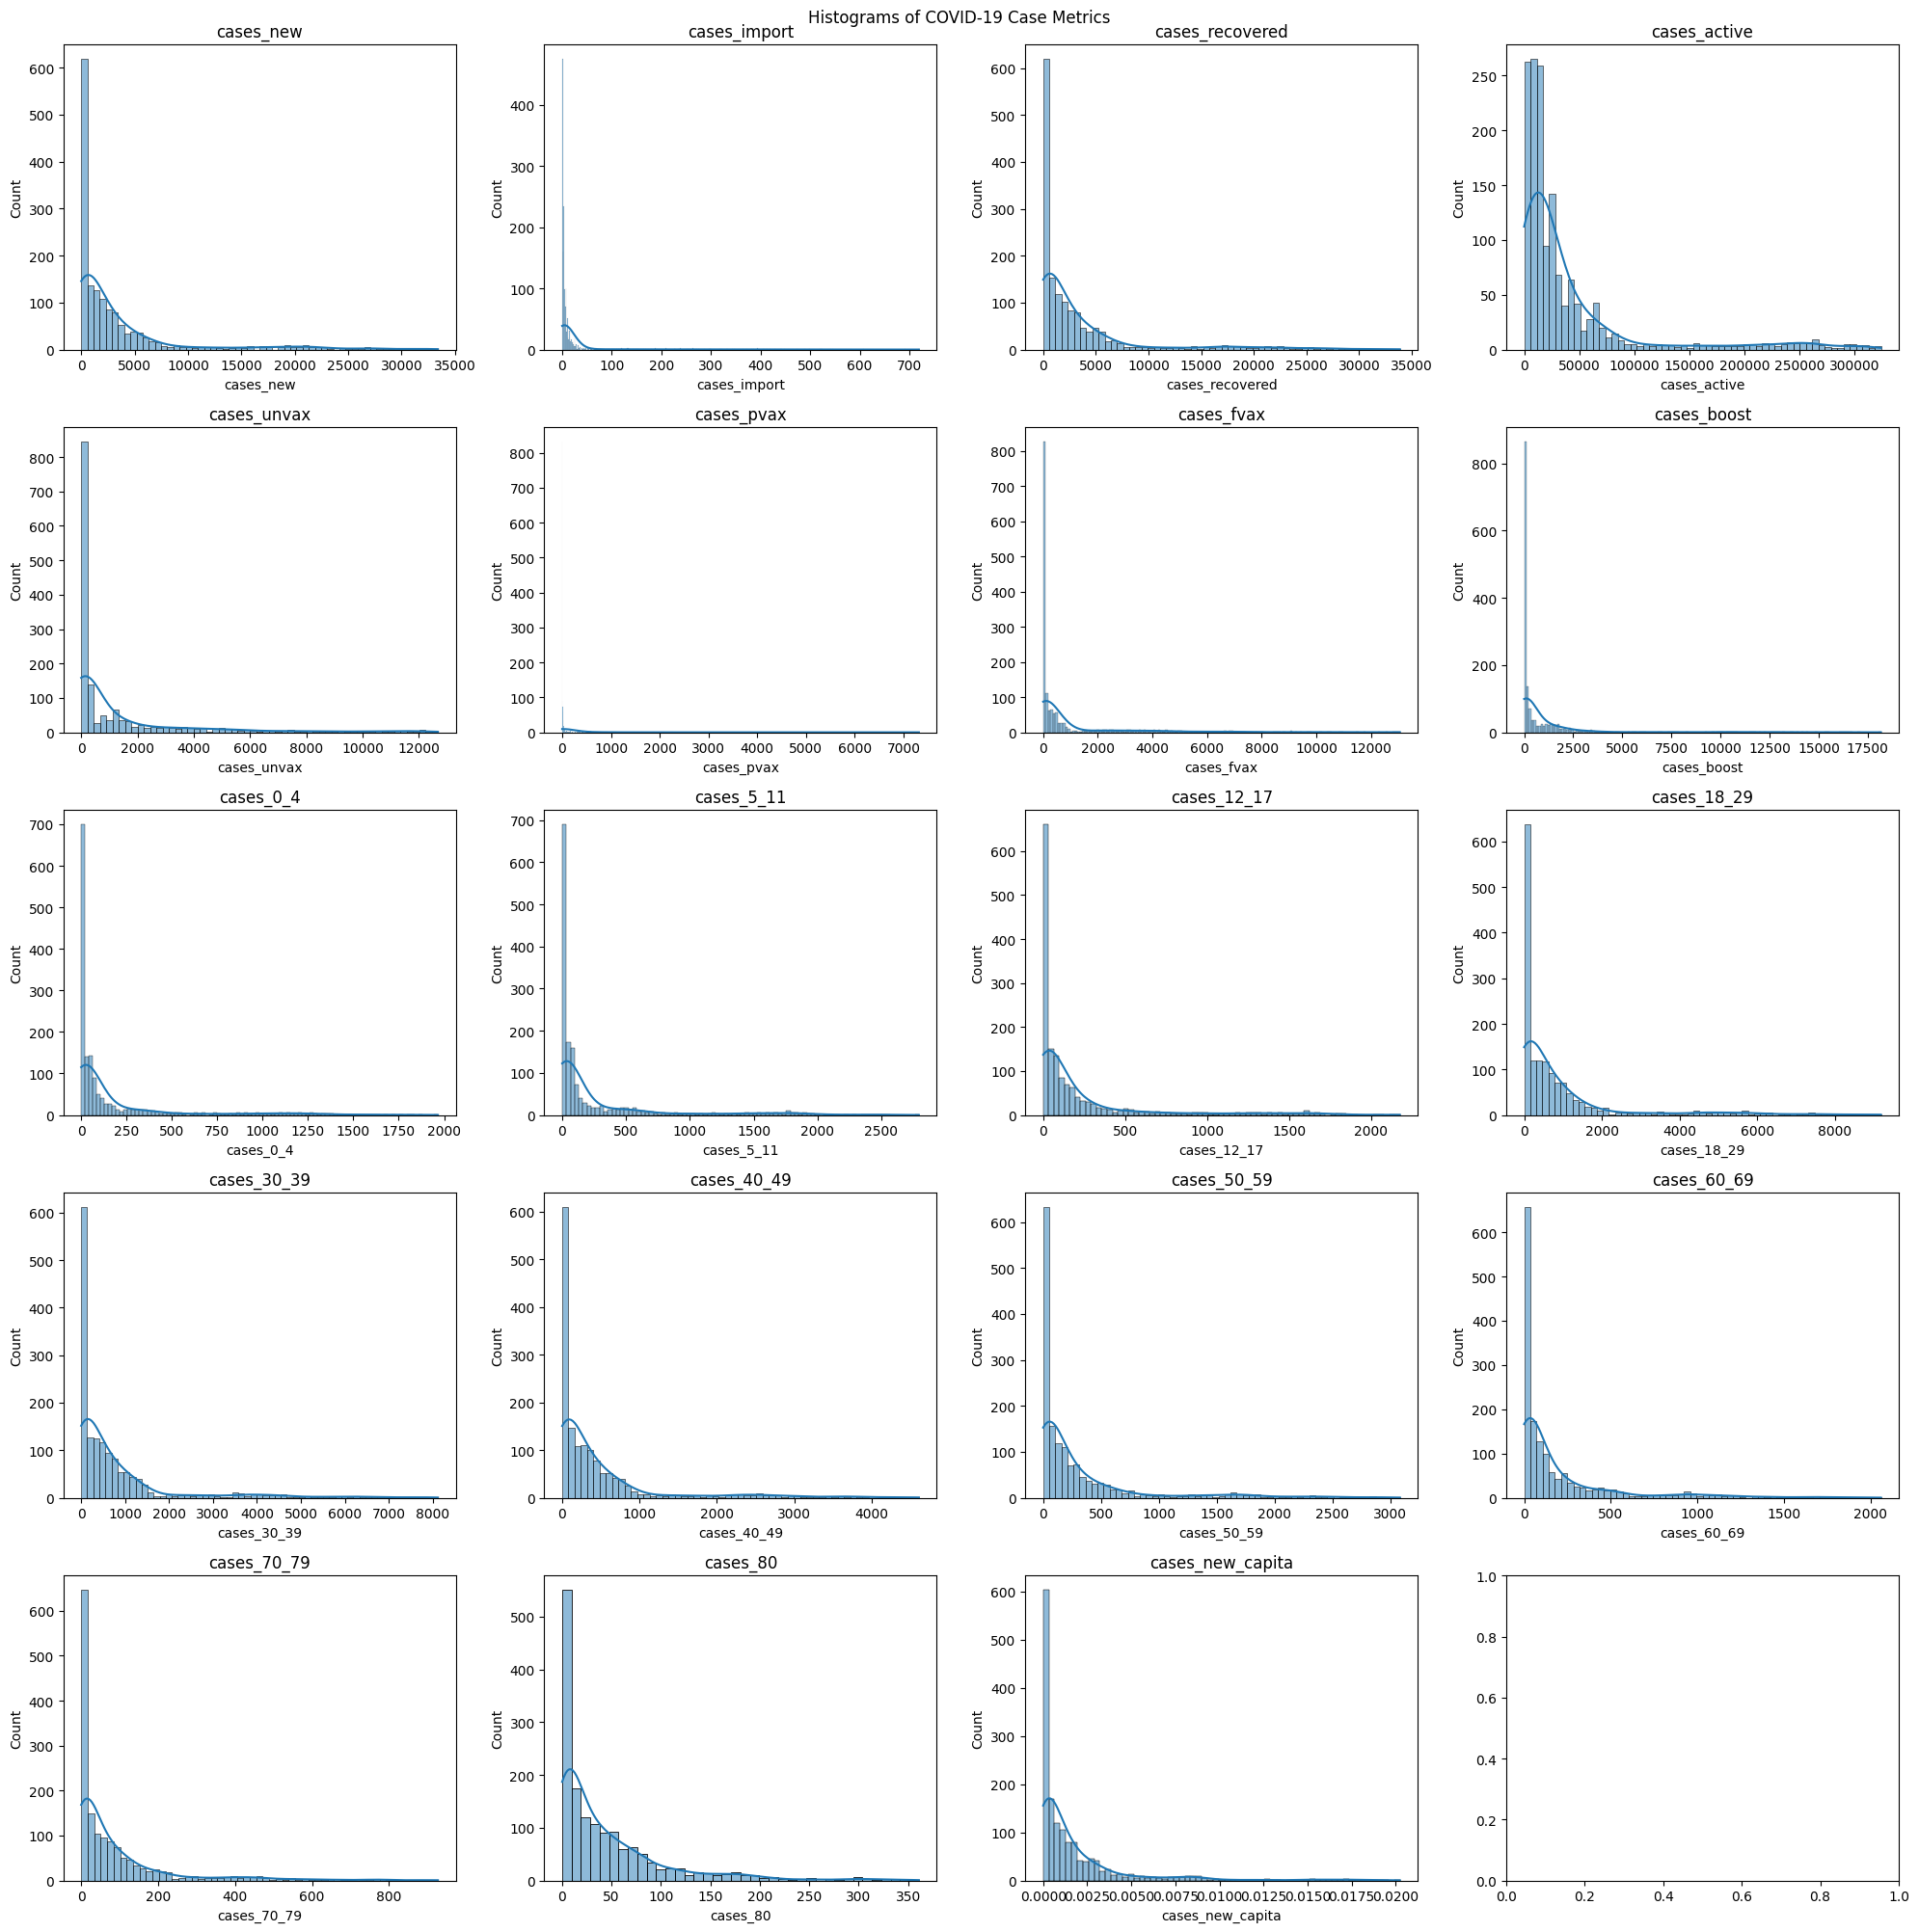

In [ ]:
cases_columns = ['cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost', 'cases_0_4',
       'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39',
       'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80','cases_new_capita']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cases_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
 
plt.tight_layout()
plt.suptitle('Histograms of COVID-19 Case Metrics',y=1)
plt.show()

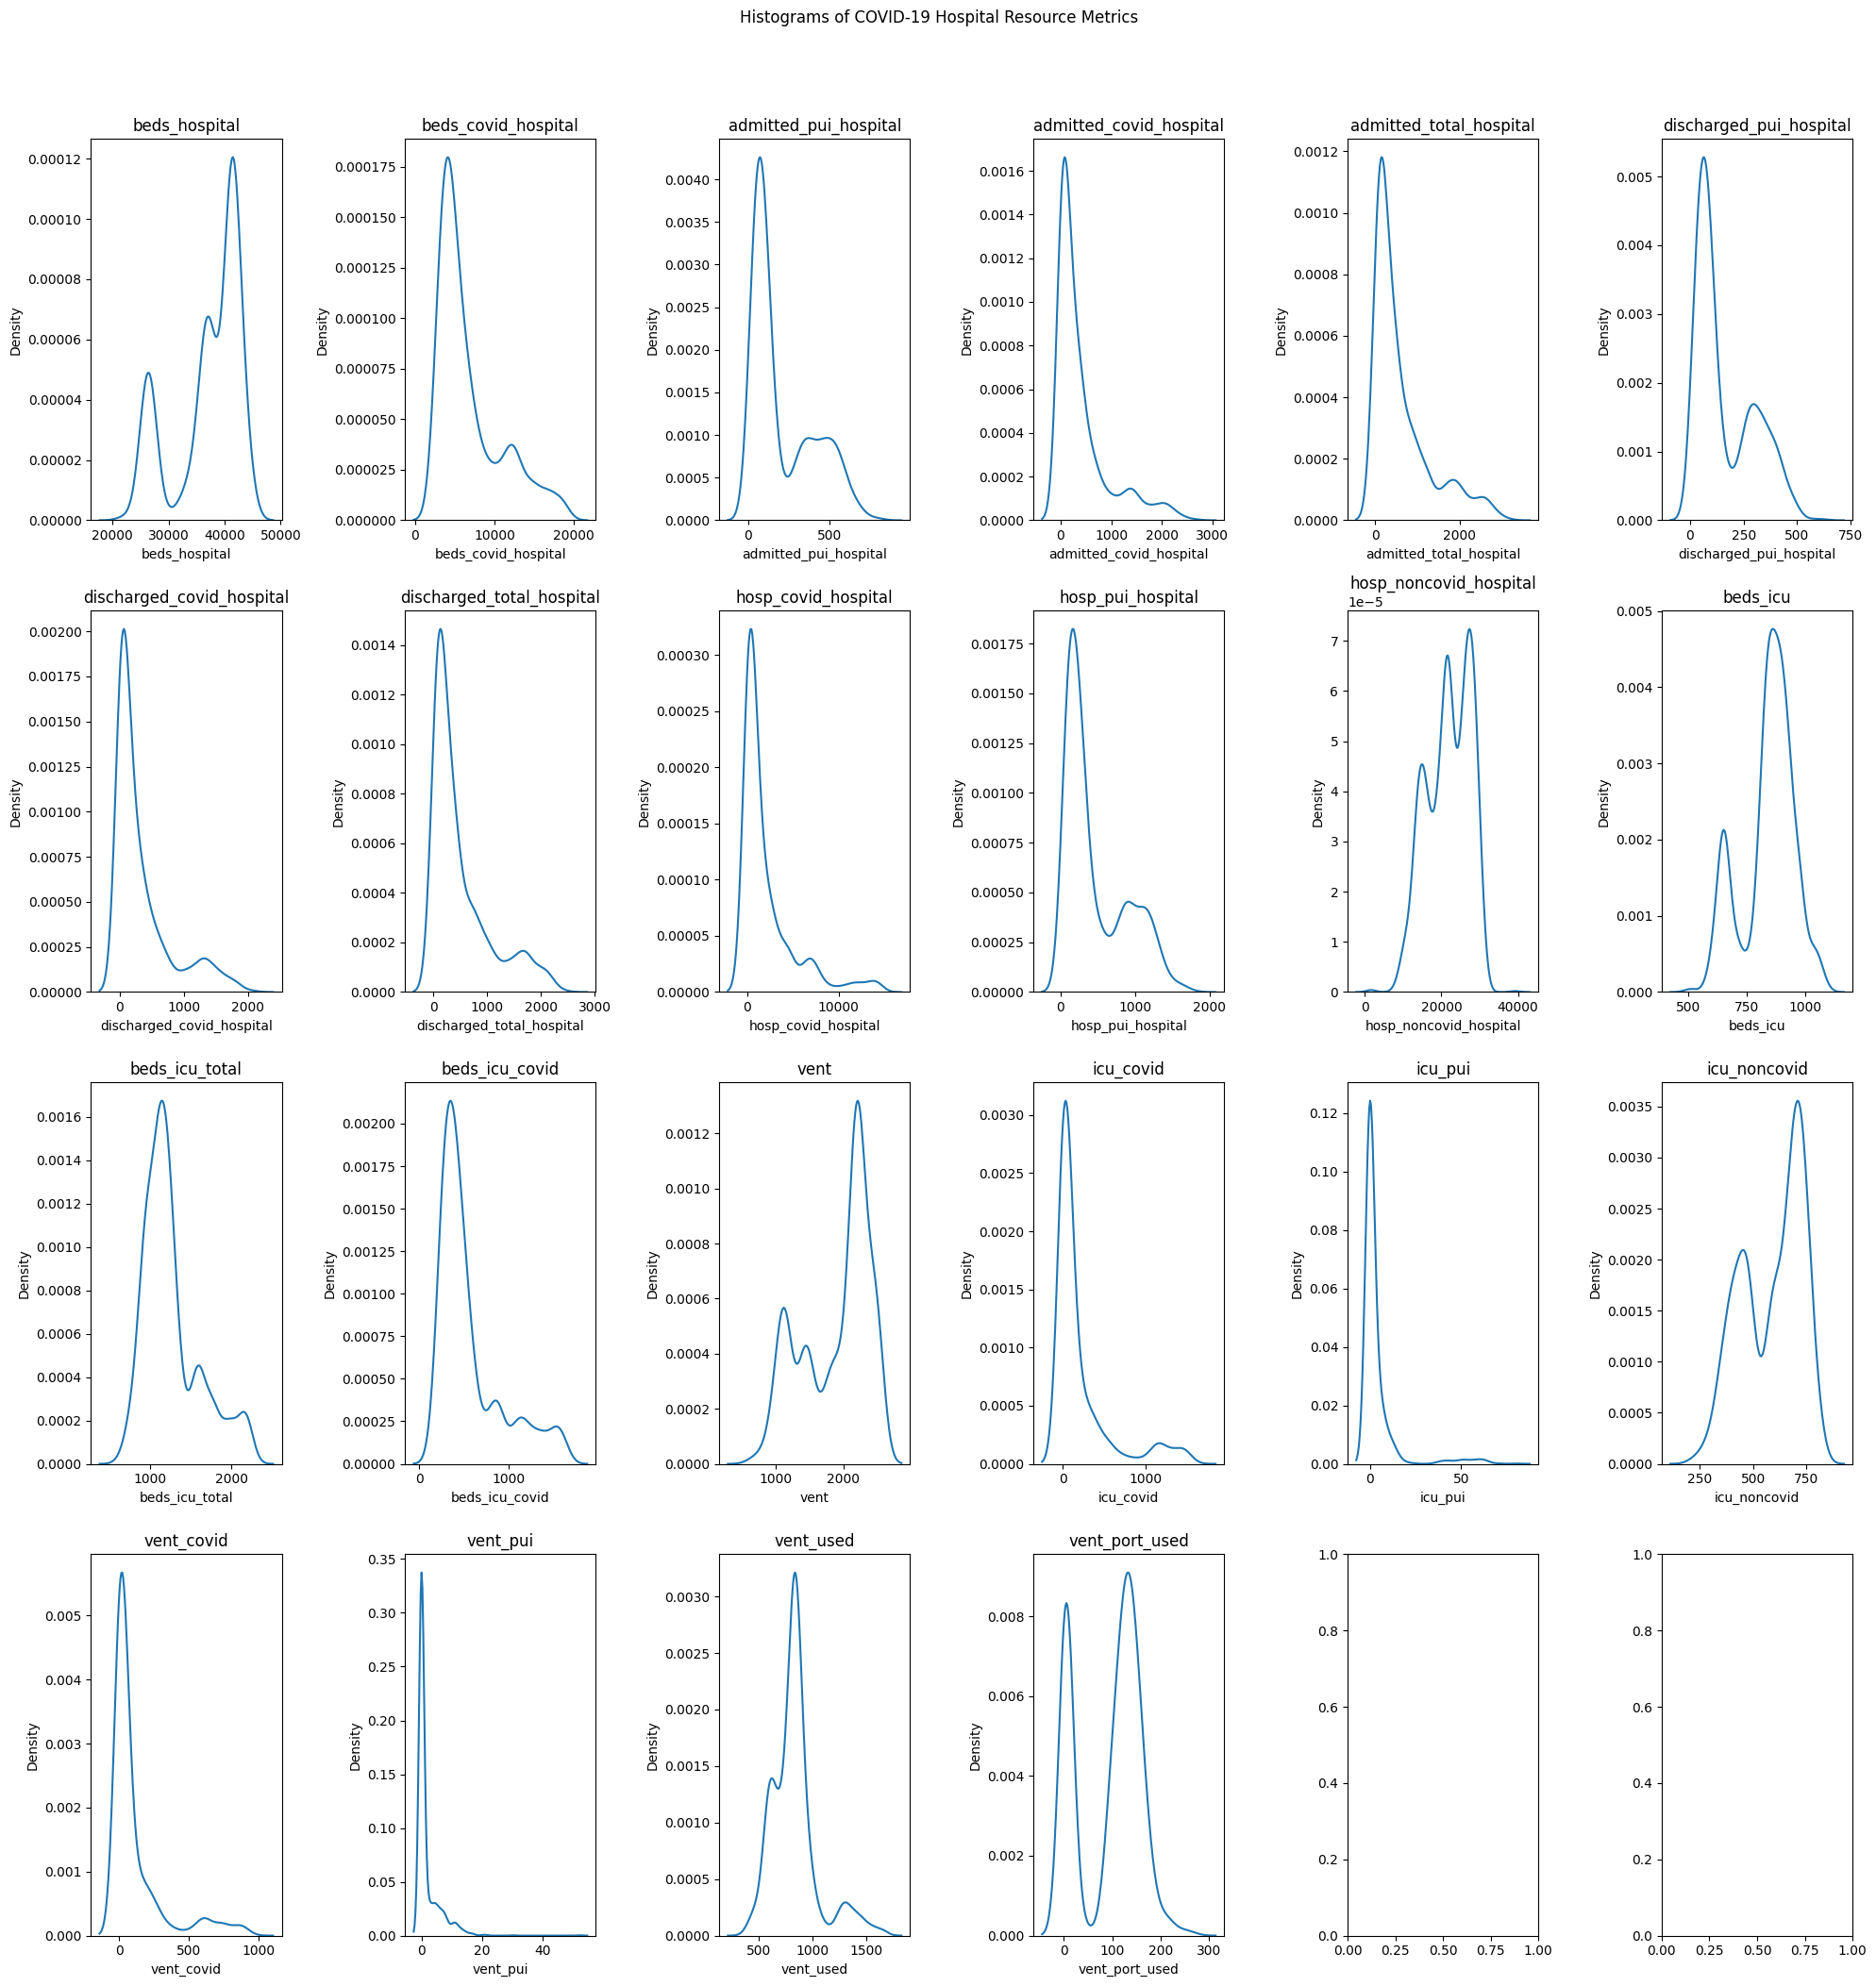

In [ ]:
tests_columns = ['beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used']

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(tests_columns):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)
 
plt.tight_layout()
plt.suptitle('Histograms of COVID-19 Hospital Resource Metrics',y=1.05)
plt.show()

In [ ]:

pp_cols =[ 'deaths_new_dod', 'deaths_bid_dod', 'rtk-ag_x', 'pcr_x',
       'daily_partial', 'daily_full', 'daily_booster', 'daily_booster2',
       'daily']
sns.pairplot(df[pp_cols])

KeyboardInterrupt: 

: 

: 